   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


/Users/ralph/.pyenv/versions/3.9.19/envs/IA/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.2552 - mae: 0.3429

Erro Quadrático Médio no Teste: 0.2615
Erro Médio Absoluto no Teste: 0.3430


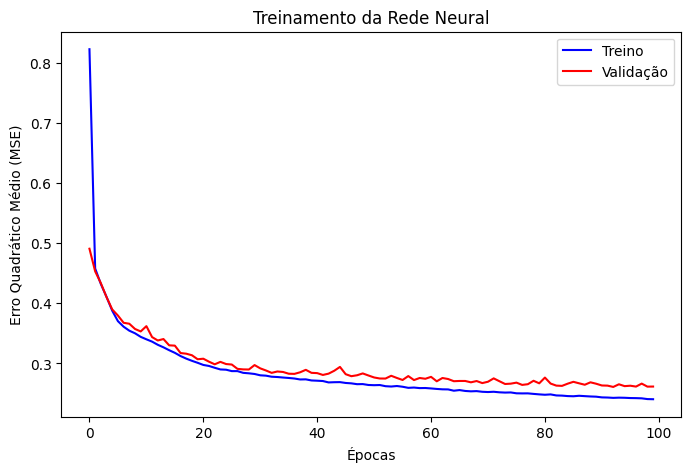

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step


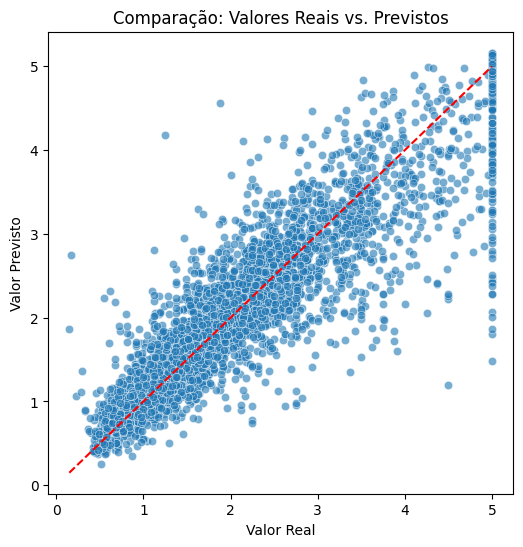

In [5]:
# 📌 1. Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# 📌 2. Carregar e Explorar os Dados
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["PRICE"] = data.target  # Variável alvo

# Mostrar as primeiras linhas do dataset
print(df.head())

# 📌 3. Pré-processamento dos Dados
X = df.drop(columns=["PRICE"]).values  # Features
y = df["PRICE"].values  # Target

# Divisão em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados para melhorar o desempenho da RNA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 4. Construindo a Rede Neural
modelo = keras.Sequential([
    keras.layers.Dense(64, activation="tanh", input_shape=(X_train.shape[1],)),  
    keras.layers.Dense(32, activation="sigmoid"),
    keras.layers.Dense(1)  # Saída única para regressão
])

# Compilando o modelo
modelo.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 📌 5. Treinamento da Rede Neural
historico = modelo.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# 📌 6. Avaliação do Modelo
resultado = modelo.evaluate(X_test, y_test)
print(f"\nErro Quadrático Médio no Teste: {resultado[0]:.4f}")
print(f"Erro Médio Absoluto no Teste: {resultado[1]:.4f}")

# 📌 7. Visualização do Treinamento
plt.figure(figsize=(8, 5))
plt.plot(historico.history["loss"], label="Treino", color="blue")
plt.plot(historico.history["val_loss"], label="Validação", color="red")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("Treinamento da Rede Neural")
plt.legend()
plt.show()

# 📌 8. Comparação: Previsão vs. Valores Reais
y_pred = modelo.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Linha ideal y=x
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Comparação: Valores Reais vs. Previstos")
plt.show()
